In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

168


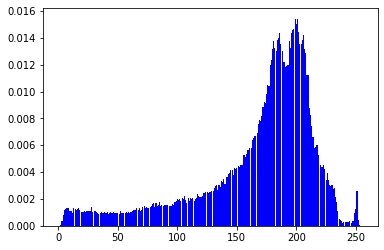

In [2]:
# 1.读取图片并转换为灰度图片
# 2.创建一个1*256的全零数组 用于存放0-255这256个像素值的个数
# 3.用for循环对像素点进行遍历
# 4.根据像素值判断 让像素值加1
# 5.用for循环进行归一化(0-1) 把每一个像素值的个数转换为百分比
# 6.画图
img=cv2.imread('image1.jpg',1)
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
print(img[0,0])
imgInfo=img.shape
heigth=imgInfo[0]
width=imgInfo[1]
dst=np.zeros(256,np.float)
# print(dst)
for i in range(heigth):
    for j in range(width):
        dst[img[i,j]]=dst[img[i,j]]+1
for i in range(256):
    dst[i]=dst[i]/(width*heigth)
x = np.linspace(0,255,256)
y = dst
plt.bar(x,y,0.9,alpha = 1 ,color = 'b')
plt.show()


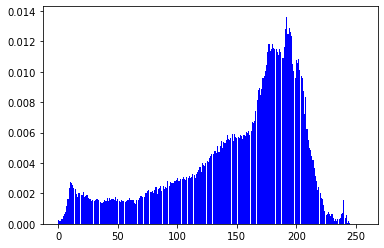

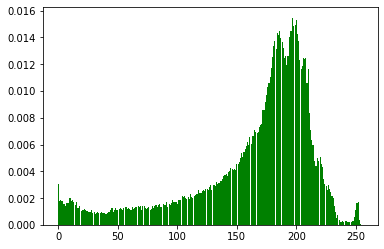

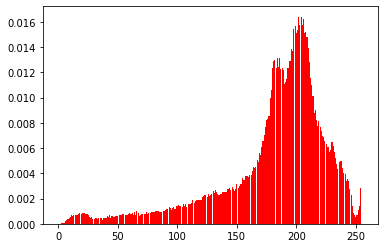

In [4]:
#彩色
img=cv2.imread('image1.jpg',1)
imgInfo=img.shape
heigth=imgInfo[0]
width=imgInfo[1]
histb=cv2.calcHist([img],[0],None,[256],[0,255])
histg=cv2.calcHist([img],[1],None,[256],[0,255])
histr=cv2.calcHist([img],[2],None,[256],[0,255])
histb=histb.reshape(256,)
histg=histg.reshape(256,)
histr=histr.reshape(256,)
for i in range(0,256):
    histb[i] = histb[i]/(heigth*width)
    histg[i] = histg[i]/(heigth*width)
    histr[i] = histr[i]/(heigth*width)
x = np.linspace(0,255,256)
yb=histb
plt.bar(x,yb,0.9,alpha = 1 ,color = 'b')
yg=histg
plt.show()
plt.bar(x,yg,0.9,alpha = 1 ,color = 'g')
yr=histr
plt.show()
plt.bar(x,yr,0.9,alpha = 1 ,color = 'r')
plt.show()

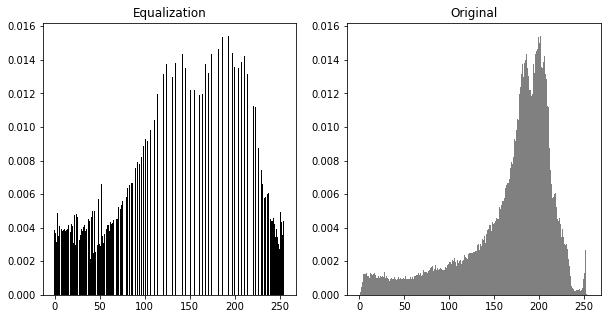

总用时 1.4303552000000082 秒


In [6]:
#灰度图均值化
import cv2
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline
start=time.perf_counter()
img=cv2.imread('image1.jpg',0)
imgInfo = img.shape
height = imgInfo[0]
width = imgInfo[1]
count = np.zeros(256,np.float)
count=cv2.calcHist([img],[0],None,[256],[0,255])
for i in range(0,255):#概率
    count[i] = count[i]/(height*width)
sum =float(0)
for i in range(0,256):
    sum = sum+count[i]
    count[i] = sum
map = np.zeros(256,np.uint16)
for i in range(0,256):
    map[i] = count[i]*255


dst = np.zeros((height,width),np.uint8)
for i in range(0,height):
    for j in range(0,width):
        index = img[i,j]
        dst[i,j] = map[index]
fig = plt.figure(figsize=(10,5))
hist=cv2.calcHist([dst],[0],None,[256],[0.0,255.0])
hist=hist.reshape(256,)
for i in range(0,256):
    hist[i] = hist[i]/(height*width)
x = np.linspace(0,255,256)
y=hist
ax1 = fig.add_subplot(1,2,1)
plt.bar(x,y,0.9,alpha = 1 ,color = 'k')
plt.title('Equalization')

hist=cv2.calcHist([img],[0],None,[256],[0.0,255.0])
hist=hist.reshape(256,)
for i in range(0,256):
    hist[i] = hist[i]/(height*width)

x = np.linspace(0,255,256)
y=hist
ax2 = fig.add_subplot(1,2,2)
plt.bar(x,y,1,alpha = 1 ,color = 'gray')
plt.title('Original')
plt.show()
cv2.imshow('img',img)
cv2.imshow('dst',dst)
end=time.perf_counter()
print('总用时',end-start,'秒')
cv2.waitKey(0)
cv2.destroyAllWindows()


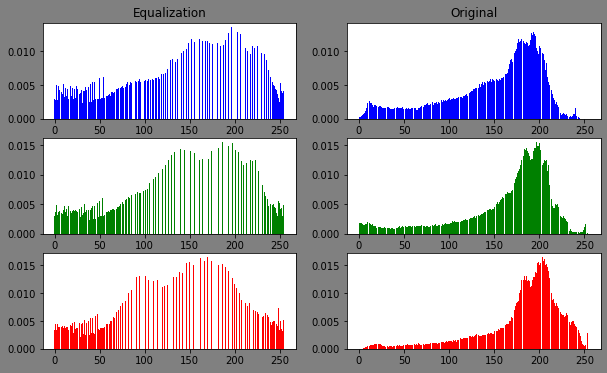

总用时 5.607822199999987 秒


In [7]:
#彩色图均值化
#1读取图片并转成彩色图
#2计算每个像素值(0-255)的概率
#3 计算每个像素值(0-255)的累计概率
#4每一个累计概率乘以一个255得到一个新的像素值（总共有256个）
#5赋值，把新的像素值(总共有256个)赋值给对应的像素点
import cv2
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline
start=time.perf_counter()
img=cv2.imread('image1.jpg',1)
imgInfo = img.shape
height = imgInfo[0]
width = imgInfo[1]

count_b = np.zeros(256,np.float)
count_g = np.zeros(256,np.float)
count_r = np.zeros(256,np.float)
count_b=cv2.calcHist([img],[0],None,[256],[0,255])
count_g=cv2.calcHist([img],[1],None,[256],[0,255])
count_r=cv2.calcHist([img],[2],None,[256],[0,255])
for i in range(0,255):
    count_b[i] = count_b[i]/(height*width)
    count_g[i] = count_g[i]/(height*width)
    count_r[i] = count_r[i]/(height*width)
sum_b = float(0)
sum_g = float(0)
sum_r = float(0)
for i in range(0,256):
    sum_b = sum_b+count_b[i]
    sum_g = sum_g+count_g[i]
    sum_r = sum_r+count_r[i]
    count_b[i] = sum_b
    count_g[i] = sum_g
    count_r[i] = sum_r
map_b = np.zeros(256,np.uint16)
map_g = np.zeros(256,np.uint16)
map_r = np.zeros(256,np.uint16)
for i in range(0,256):#累计概率乘以一个255得到一个新的像素值
    map_b[i] = np.uint16(count_b[i]*255)
    map_g[i] = np.uint16(count_g[i]*255)
    map_r[i] = np.uint16(count_r[i]*255)
dst = np.zeros((height,width,3),np.uint8)
for i in range(0,height):
    for j in range(0,width):
        (b,g,r) = img[i,j]
        # 赋值，把新的像素值(总共有256个)赋值给对应的像素点
        b = map_b[b]
        g = map_g[g]
        r = map_r[r]
        dst[i,j] = (b,g,r)

histb=cv2.calcHist([dst],[0],None,[256],[0,255])
histg=cv2.calcHist([dst],[1],None,[256],[0,255])
histr=cv2.calcHist([dst],[2],None,[256],[0,255])
histb=histb.reshape(256,)
histg=histg.reshape(256,)
histr=histr.reshape(256,)
for i in range(0,256):
    histb[i] = histb[i]/(height*width)
    histg[i] = histg[i]/(height*width)
    histr[i] = histr[i]/(height*width)  
x = np.linspace(0,255,256)
yb=histb
yg=histg
yr=histr
fig = plt.figure(figsize=(10,6),facecolor = 'gray')
ax1 = fig.add_subplot(3,2,1)
plt.bar(x,yb,0.9,alpha = 1 ,color = 'b')
plt.title('Equalization')
ax3 = fig.add_subplot(3,2,3)
plt.bar(x,yg,0.9,alpha = 1 ,color = 'g')
ax6 = fig.add_subplot(3,2,5)
plt.bar(x,yr,0.9,alpha = 1 ,color = 'r')
histb=cv2.calcHist([img],[0],None,[256],[0,255])
histg=cv2.calcHist([img],[1],None,[256],[0,255])
histr=cv2.calcHist([img],[2],None,[256],[0,255])
histb=histb.reshape(256,)
histg=histg.reshape(256,)
histr=histr.reshape(256,)
for i in range(0,256):
    histb[i] = histb[i]/(height*width)
    histg[i] = histg[i]/(height*width)
    histr[i] = histr[i]/(height*width)


yb_x=histb
yg_x=histg
yr_x=histr

ax2 = fig.add_subplot(3,2,2)
plt.bar(x,yb_x,0.9,alpha = 1 ,color = 'b')
plt.title('Original')

ax4 = fig.add_subplot(3,2,4)
plt.bar(x,yg_x,0.9,alpha = 1 ,color = 'g')
ax5 = fig.add_subplot(3,2,6)
plt.bar(x,yr_x,0.9,alpha = 1 ,color = 'r')
plt.show()

cv2.imshow('img',img)
cv2.imshow('dst',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()
end=time.perf_counter()
print('总用时',end-start,'秒')

In [8]:
#产生噪声图片
import cv2
import numpy as np
import copy
import random
import time
start=time.perf_counter()
img=cv2.imread('image1.jpg',1)
imgInfo = img.shape
height = imgInfo[0]
width = imgInfo[1]

pertotal=0.03#总噪声占比
persalt=0.5#盐占比
perpep=1-persalt#椒占比

NoiseImg=img.copy()
NoiseNum=int(pertotal*height*width)

for i in range(0,NoiseNum):  
    rows=np.random.randint(0,height-1)#产生0-（height-1）的随机数
    cols=np.random.randint(0,width-1)
    if (np.random.randint(0,100)<persalt*100):   #如果0-100之间小于10
        NoiseImg[rows,cols]=(255,255,255)
    else: #否则产生椒
        NoiseImg[rows,cols]=(0,0,0)
cv2.imshow('dst',NoiseImg)        
cv2.imwrite('qq.jpg',NoiseImg)
end=time.perf_counter()
print('总用时',end-start,'秒')
cv2.waitKey(0)

cv2.destroyAllWindows()

总用时 0.16201469999998608 秒


In [9]:
#均值滤波 滤波模板5*5  1/25
#读取图片（还有噪声的图片）
#用for循环对每个像素点进行一下操作（注意边界处的处理）
#某个像素值周围的6*6个像素求和 然后求均值 赋给当前像素值
import cv2
import numpy as np
import time
start=time.perf_counter()
# img = cv2.imread('image1.jpg',1)
img=NoiseImg#有噪声图片
imgInfo = img.shape
height = imgInfo[0]
width = imgInfo[1]
dst = np.zeros((height,width,3),np.uint8)
for i in range(height):
    for j in range(width):
        sum_b = int(0)
        sum_g = int(0)
        sum_r = int(0)
        for m in range(-2,3):# -2 -1 0 1 2
            for n in range(-2,3):
                # 处理越界
                if i + m >= height or i + m < 0:
                    m = -m
                if j + n >= width or j + n < 0:
                    n = -n
                (b,g,r) = img[i+m,j+n]
                sum_b = sum_b+int(b)
                sum_g = sum_g+int(g)
                sum_r = sum_r+int(r)
            
        b = np.uint8(sum_b/25)
        g = np.uint8(sum_g/25)
        r = np.uint8(sum_r/25)
        dst[i,j] = (b,g,r)

cv2.imshow('src',img)
cv2.imshow('dst',dst)
end=time.perf_counter()
print('总用时',end-start,'秒')
cv2.waitKey(0)
cv2.destroyAllWindows()#关闭所有窗口

总用时 13.327761499999951 秒


In [10]:
#高斯滤波
hx=np.array([[0.05,0.1,0.05],
           [0.1,0.4,0.1],
           [0.05,0.1,0.05]])
img=NoiseImg
imgInfo = img.shape
height = imgInfo[0]
width = imgInfo[1]
dst=np.zeros(imgInfo,np.uint8)
for i in range(1,height-1):
    for j in range(1,width-1):
        sum_b = int(0)
        sum_g = int(0)
        sum_r = int(0)
        hb_x=img[i-1:i+2,j-1:j+2,0]
        hg_x=img[i-1:i+2,j-1:j+2,1]
        hr_x=img[i-1:i+2,j-1:j+2,2]
        hb=hb_x*hx
        hg=hg_x*hx
        hr=hr_x*hx
        for ii in range(3):
            for jj in range(3):
                sum_b=sum_b+hb[ii,jj]
                sum_g=sum_g+hg[ii,jj]
                sum_r=sum_r+hr[ii,jj]
        (b,g,r)=(int(sum_b),int(sum_g),int(sum_r))
        dst[i,j]=(b,g,r)
cv2.imshow('dst',dst)
cv2.imshow('imae',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [11]:
#高斯滤波
hx=np.array([[0.05,0.1,0.05],
           [0.1,0.4,0.1],
           [0.05,0.1,0.05]])
img=NoiseImg
imgInfo = img.shape
height = imgInfo[0]
width = imgInfo[1]
dst=np.zeros(imgInfo,np.uint8)
for i in range(1,height-1):
    for j in range(1,width-1):
        sum_b = int(0)
        sum_g = int(0)
        sum_r = int(0)
        hb=img[i-1:i+2,j-1:j+2,0]*hx
        hg=img[i-1:i+2,j-1:j+2,1]*hx
        hr=img[i-1:i+2,j-1:j+2,2]*hx
        for ii in range(3):
            for jj in range(3):
                sum_b=sum_b+hb[ii,jj]
                sum_g=sum_g+hg[ii,jj]
                sum_r=sum_r+hr[ii,jj]
        (b,g,r)=(int(sum_b),int(sum_g),int(sum_r))
        dst[i,j]=(b,g,r)
cv2.imshow('dst',dst)
cv2.imshow('imae',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [12]:
#中值滤波
img=NoiseImg
imgInfo = img.shape
height = imgInfo[0]
width = imgInfo[1]
dst=np.zeros(imgInfo,np.uint8)
for i in range(1,height-1):
    for j in range(1,width-1):
        hb=img[i-1:i+2,j-1:j+2,0]
        hg=img[i-1:i+2,j-1:j+2,1]
        hr=img[i-1:i+2,j-1:j+2,2]
        hb=hb.reshape(9,)
        hg=hg.reshape(9,)
        hr=hr.reshape(9,)
        (b,g,r)=(np.sort(hb)[4],np.sort(hg)[4],np.sort(hr)[4])
        dst[i,j]=(b,g,r)
cv2.imshow('dst',dst)
cv2.imshow('imae',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [13]:
#双边滤波 调用函数 bilateralFilter
import cv2
img = cv2.imread('image1.jpg', 1)
dst=cv2.bilateralFilter(img,25,100,100)
cv2.imshow('dst',dst)
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [15]:
#亮度增强
import cv2
import numpy as np
img = cv2.imread('image1.jpg',1)
imgInfo = img.shape
height = imgInfo[0]
width = imgInfo[1]
cv2.imshow('src',img)
dst = np.zeros((height,width,3),np.uint8)
for i in range(0,height):
    for j in range(0,width):
        (b,g,r) = img[i,j]
        bb = int(b)+40
        gg = int(g)+40
        rr = int(r)+40
        if bb>255:
            bb = 255
        if gg>255:
            gg = 255
        if rr>255:
            rr = 255
        dst[i,j] = (bb,gg,rr)
cv2.imshow('dst',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()